# Projeto 1 - Análise de Risco no Transporte Público

O conjunto de dados lista incidentes de trânsito ocorridos na cidade de Londres.
Fonte de Dados disponível em: https://data.world/makeovermonday/2018w51

Objetivo: Analisar os dados, construir gráficos e responder as perguntas abaixo utilizando linguagem Python.

In [1]:
#Versão da Linguagem Python
from platform import python_version
print("Versão python utilizada neste projeto: ", python_version())

Versão python utilizada neste projeto:  3.9.13


In [2]:
#Instala o pacote watermark. 
!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

numpy     : 1.21.5
matplotlib: 3.5.2
pandas    : 1.4.4
seaborn   : 0.11.2



Carregando o Dataset

In [6]:
#Carrega o  dataset
df = pd.read_csv('tfl_bus_safety.csv')

In [7]:
# Tipo do objeto
type(df)

pandas.core.frame.DataFrame

In [8]:
#Indica quantas linhas e colunas tem o dataset
df.shape

(23158, 12)

In [9]:
#Total de registros considerando cada coluna
df.size

277896

In [10]:
#Verifica os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       23158 non-null  int64 
 1   date_of_incident           23158 non-null  object
 2   route                      23158 non-null  object
 3   operator                   23158 non-null  object
 4   group_name                 23158 non-null  object
 5   bus_garage                 23158 non-null  object
 6   borough                    23158 non-null  object
 7   injury_result_description  23158 non-null  object
 8   incident_event_type        23158 non-null  object
 9   victim_category            23158 non-null  object
 10  victims_sex                23158 non-null  object
 11  victims_age                23158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.1+ MB


In [11]:
#Amostra das 5 primeiras linhas
df.head(5)

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [12]:
#Amostra das 5 últimas linhas
df.tail()

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
23153,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23154,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23155,2018,2018-09-01,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult
23156,2018,2018-09-01,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23157,2018,2018-09-01,(blank),Metroline,Metroline,Holloway,Islington,Injuries treated on scene,Personal Injury,Other,Unknown,Unknown


In [13]:
#Colunas dos conjunto de dados
df.columns

Index(['year', 'date_of_incident', 'route', 'operator', 'group_name',
       'bus_garage', 'borough', 'injury_result_description',
       'incident_event_type', 'victim_category', 'victims_sex', 'victims_age'],
      dtype='object')

In [14]:
#Método value_counts() para cada tipo de dado
df.dtypes.value_counts()

object    11
int64      1
dtype: int64

In [15]:
#Verificando o tipo de dado de cada coluna
df.dtypes

year                          int64
date_of_incident             object
route                        object
operator                     object
group_name                   object
bus_garage                   object
borough                      object
injury_result_description    object
incident_event_type          object
victim_category              object
victims_sex                  object
victims_age                  object
dtype: object

In [16]:
#Verificando se há registros duplicados
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23153    False
23154    False
23155    False
23156    False
23157    False
Length: 23158, dtype: bool

In [17]:
#Verificando se há valores ausentes
df.isnull().sum()

year                         0
date_of_incident             0
route                        0
operator                     0
group_name                   0
bus_garage                   0
borough                      0
injury_result_description    0
incident_event_type          0
victim_category              0
victims_sex                  0
victims_age                  0
dtype: int64

In [18]:
#Verificando os tipos de incidente no dataset e suas quantidades
tipos_incidente = df['incident_event_type'].value_counts()
print(tipos_incidente)

Slip Trip Fall             6981
Onboard Injuries           6563
Personal Injury            4596
Collision Incident         4166
Assault                     590
Activity Incident Event     114
Vandalism Hooliganism        73
Safety Critical Failure      66
Fire                          6
Robbery                       3
Name: incident_event_type, dtype: int64


In [19]:
#Verificando os tipos de vítima no dataset e suas quantidades
categorias_vitima = df['victim_category'].value_counts()
print(categorias_vitima)

Passenger                      18828
Pedestrian                      1612
Bus Driver                      1484
3rd Party driver / Occupant      573
Cyclist                          275
Member Of Public                 127
Motorcyclist                     102
Operational Staff                 59
Cyclist                           33
Conductor                         28
Other                             16
Contractor Staff                   6
TfL Staff                          4
Non-Operational Staff              4
Motorcyclist                       4
Insufficient Data                  2
Operations staff (other)           1
Name: victim_category, dtype: int64


In [20]:
#Verificando as descrições dos incidentes no dataset e suas quantidades
descr_incidente = df['injury_result_description'].value_counts()
print(descr_incidente)

Injuries treated on scene                                          17336
Taken to Hospital – Reported Serious Injury or Severity Unknown     2994
Reported Minor Injury - Treated at Hospital                         2786
Fatal                                                                 42
Name: injury_result_description, dtype: int64


Perguntas

1- Qual a quantidade de incidentes por gênero?

In [21]:
#Filtrando o dataset por gênero e calculando a quantidade de incidentes por gênero
df1 = df['victims_sex'].value_counts()
print(df1)

Female     11847
Male        7709
Unknown     3602
Name: victims_sex, dtype: int64


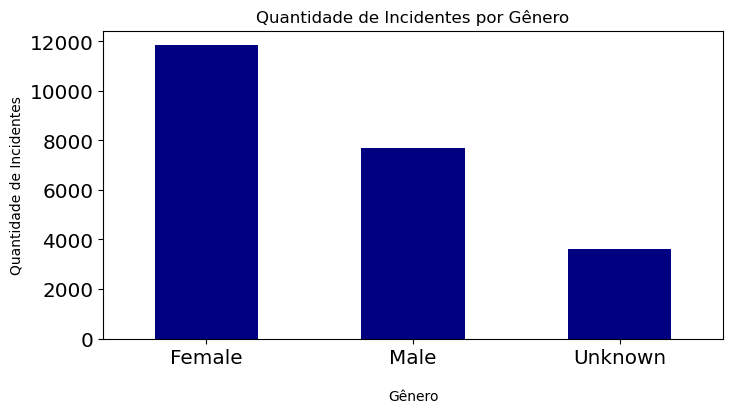

In [22]:
#Gráfico com matplotlib
df1.plot(kind = 'bar', 
                title = 'Quantidade de Incidentes por Gênero',
                ylabel = 'Quantidade de Incidentes', 
                xlabel = '\nGênero',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 0)
plt.show()

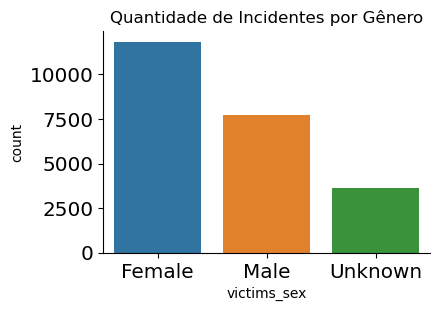

In [23]:
#Gráfico com seaborn
sns.catplot(data=df, x='victims_sex',kind='count',ci=None,legend_out=False,
            height=3, aspect=1.5, order=df['victims_sex'].value_counts().index);
plt.title('Quantidade de Incidentes por Gênero');

2- Qual faixa etária esteve mais envolvida nos incidentes?

In [24]:
#Filtrando os incidentes por faixa etária e calculando a quantidade de incidentes por faixa etária
df2 = df['victims_age'].value_counts()
print(df2)

Adult      10754
Unknown     7135
Elderly     2769
Child       2181
Youth        319
Name: victims_age, dtype: int64


In [25]:
#Destacando a faixa etária mais envolvida em incidentes
df3 = df2.idxmax()
print('Faixa etária mais envolvida nos incidentes:', df3)

Faixa etária mais envolvida nos incidentes: Adult


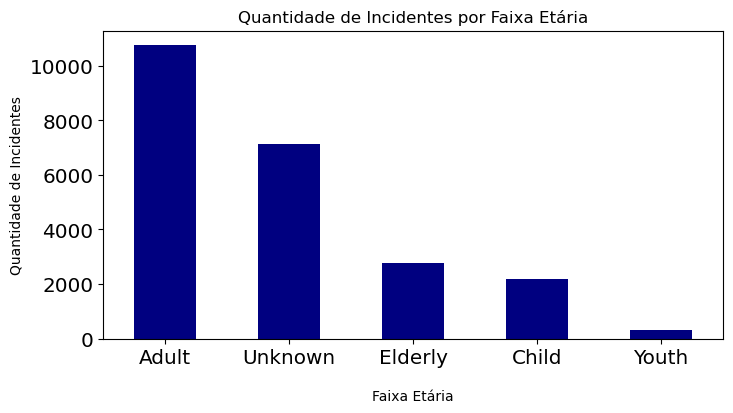

In [26]:
#Gráfico com matplotlib
df['victims_age'].value_counts().plot(kind = 'bar', 
                title = 'Quantidade de Incidentes por Faixa Etária',
                ylabel = 'Quantidade de Incidentes', 
                xlabel = '\nFaixa Etária',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 0)
plt.show()

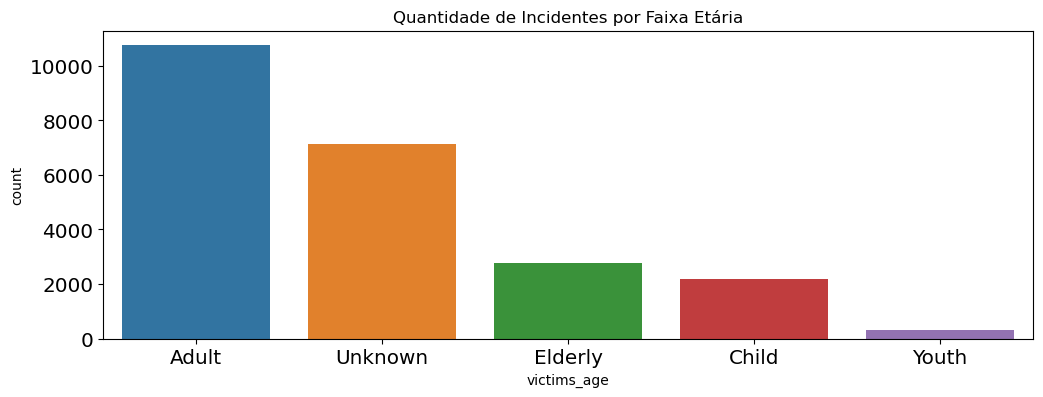

In [27]:
#Gráfico com seaborn
sns.countplot(x=df['victims_age'], order=df['victims_age'].value_counts().index); 
plt.title('Quantidade de Incidentes por Faixa Etária');

3- Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

In [28]:
#Filtrando os incidentes por tipo de evento e calculando a quantidade de incidentes por tipo de evento
df4 = df['incident_event_type'].value_counts()
print(df4)

Slip Trip Fall             6981
Onboard Injuries           6563
Personal Injury            4596
Collision Incident         4166
Assault                     590
Activity Incident Event     114
Vandalism Hooliganism        73
Safety Critical Failure      66
Fire                          6
Robbery                       3
Name: incident_event_type, dtype: int64


In [29]:
#Número total de incidentes
df_total = df4.sum()
print(df_total)

23158


In [30]:
#Calculando os percentuais
df_percentual = (df4 / df_total) * 100

In [31]:
#Percentual de incidentes por tipo de evento
print(df_percentual)

Slip Trip Fall             30.145090
Onboard Injuries           28.340098
Personal Injury            19.846273
Collision Incident         17.989464
Assault                     2.547716
Activity Incident Event     0.492270
Vandalism Hooliganism       0.315226
Safety Critical Failure     0.284999
Fire                        0.025909
Robbery                     0.012954
Name: incident_event_type, dtype: float64


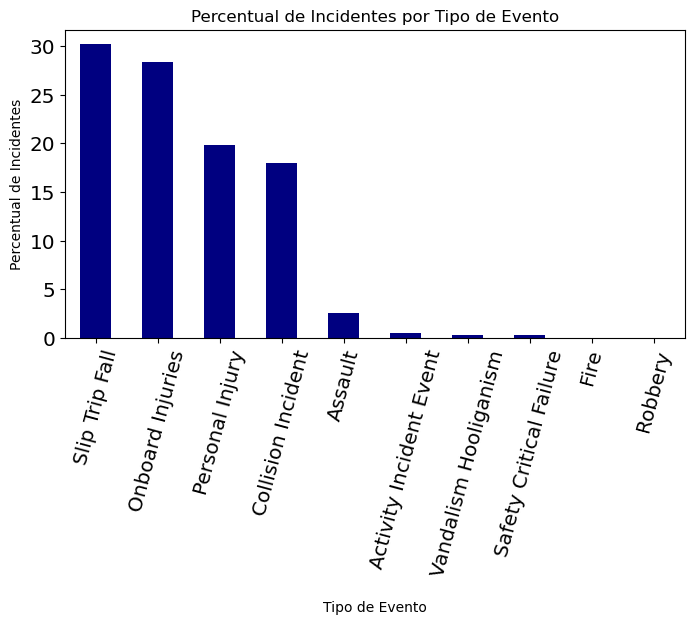

In [32]:
#Gráfico com matplotlib
df_percentual.plot(kind = 'bar', 
                title = 'Percentual de Incidentes por Tipo de Evento',
                ylabel = 'Percentual de Incidentes', 
                xlabel = '\nTipo de Evento',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 75)
plt.show()

4- Como foi a evolução de incidentes por mês ao longo do tempo?

In [33]:
#Convertendo a coluna de data para o tipo datetime para obter o formato adequado
df['date_of_incident'] = pd.to_datetime(df['date_of_incident'], dayfirst = True)

In [34]:
#Verificando o tipo de dado de cada coluna
df.dtypes

year                                  int64
date_of_incident             datetime64[ns]
route                                object
operator                             object
group_name                           object
bus_garage                           object
borough                              object
injury_result_description            object
incident_event_type                  object
victim_category                      object
victims_sex                          object
victims_age                          object
dtype: object

In [35]:
#Extraindo o mês criando uma nova variável
df['Mes'] = df['date_of_incident'].dt.month

In [36]:
#Extraindo o ano criando uma nova variável
df['Ano'] = df['date_of_incident'].dt.year

In [37]:
#Verificando quantas linhas e colunas tem o dataset após a criação das duas novas variáveis
df.shape

(23158, 14)

In [38]:
#Verificando as colunas criadas
df.head()

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age,Mes,Ano
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1,2015
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,1,2015
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,2015
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,2015
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,1,2015


In [39]:
#Colocando a coluna data como índice
df.set_index('date_of_incident', inplace = True)

In [40]:
#Verificando o índice
df.head()

,year,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age,Mes,Ano
date_of_incident,,,,,,,,,,,,,
2015-01-01,2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1,2015
2015-01-01,2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,1,2015
2015-01-01,2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,2015
2015-01-01,2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,2015
2015-01-01,2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,1,2015


In [41]:
#Convertendo a coluna "Mes" para tipo inteiro para fazer a conversão para o nome dos meses em seguida
df['Mes'] = df.Mes.astype(int)

In [42]:
#Convertendo o número dos meses para o nome dos meses (utilizando o pacote calendar)
df['Mes_nome'] = df['Mes'].apply(lambda x: calendar.month_abbr[x])

In [43]:
#Verificando a criação da nova coluna Mes_nome
df.head()

,year,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age,Mes,Ano,Mes_nome
date_of_incident,,,,,,,,,,,,,,
2015-01-01,2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1,2015,Jan
2015-01-01,2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,1,2015,Jan
2015-01-01,2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,2015,Jan
2015-01-01,2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,2015,Jan
2015-01-01,2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,1,2015,Jan


In [44]:
#Verificando as primeiras linhas da coluna "Mes"
df['Mes_nome'].head()

date_of_incident
2015-01-01    Jan
2015-01-01    Jan
2015-01-01    Jan
2015-01-01    Jan
2015-01-01    Jan
Name: Mes_nome, dtype: object

In [45]:
#Filtrando os incidentes por mês e calculando suas quantidades
df_incidentes_mes = df['Mes_nome'].value_counts()

In [46]:
#Verificando o resultado
print(df_incidentes_mes)

Jul    2268
Sep    2109
Jun    2097
May    2065
Apr    2044
Mar    2023
Aug    2013
Feb    1849
Jan    1847
Nov    1691
Oct    1642
Dec    1510
Name: Mes_nome, dtype: int64


In [47]:
#Organizando os eixos para a plotagem do gráfico
meses = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
valores = [1847,1849,2023,2044,2065,2097,2268,2013,2109,1642,1691,1510]

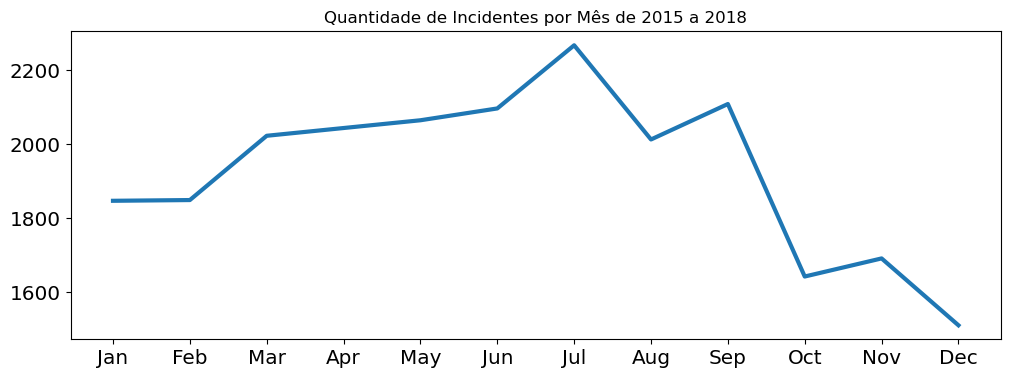

In [48]:
#Gráfico no Matplolib
plt.plot(meses, valores)
plt.title('Quantidade de Incidentes por Mês de 2015 a 2018')
plt.show()

In [49]:
#Agrupando por ano e calculando as quantidades por mês
df_ano_mes = df.groupby(['Ano'])['Mes_nome'].value_counts()
print(df_ano_mes)

Ano   Mes_nome
2015  Jun         564
      Jul         558
      Dec         523
      Nov         495
      Sep         487
      May         472
      Apr         470
      Oct         470
      Mar         460
      Aug         446
      Jan         399
      Feb         371
2016  Nov         612
      Sep         582
      Oct         551
      Aug         513
      Jul         507
      Apr         504
      May         494
      Feb         484
      Dec         471
      Jan         466
      Jun         460
      Mar         449
2017  Jul         650
      Oct         621
      Nov         584
      Mar         579
      Apr         563
      Aug         563
      Sep         549
      Dec         516
      Jun         516
      May         510
      Feb         487
      Jan         435
2018  May         589
      Jun         557
      Jul         553
      Jan         547
      Mar         535
      Apr         507
      Feb         507
      Aug         491
      Sep        

5- Quando o incidente foi “Collision Incident” em qual mês houve o maior 
número de incidentes envolvendo pessoas do sexo feminino?

In [50]:
#Filtrando o dataset pelo tipo de incidente e pelo gênero desejados
df_colisao_feminino = df[(df.incident_event_type == 'Collision Incident') & (df.victims_sex == 'Female')]

In [51]:
#Agrupando por mês, calculando o total pelo gênero feminino e ordenando os valores do maior para o menor
df_maior_fem = df_colisao_feminino.groupby('Mes_nome')['victims_sex'].value_counts()

In [52]:
print(df_maior_fem)

Mes_nome  victims_sex
Apr       Female         147
Aug       Female         122
Dec       Female          76
Feb       Female         116
Jan       Female         137
Jul       Female         147
Jun       Female         150
Mar       Female         129
May       Female         123
Nov       Female         140
Oct       Female         113
Sep       Female         158
Name: victims_sex, dtype: int64


In [53]:
#Destacando o mês em que houve o maior número de incidentes envolvendo pessoas do sexo feminino
df10 = df_maior_fem.idxmax()
print('Quando o incidente foi “Collision Incident”, o mês em que houve o maior número de incidentes envolvendo pessoas do sexo feminino foi:', df10)

Quando o incidente foi “Collision Incident”, o mês em que houve o maior número de incidentes envolvendo pessoas do sexo feminino foi: ('Sep', 'Female')


In [54]:
#Organizando os eixos para a plotagem do gráfico
meses = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
valores2 = [137,116,129,147,123,150,147,122,158,113,140,76]

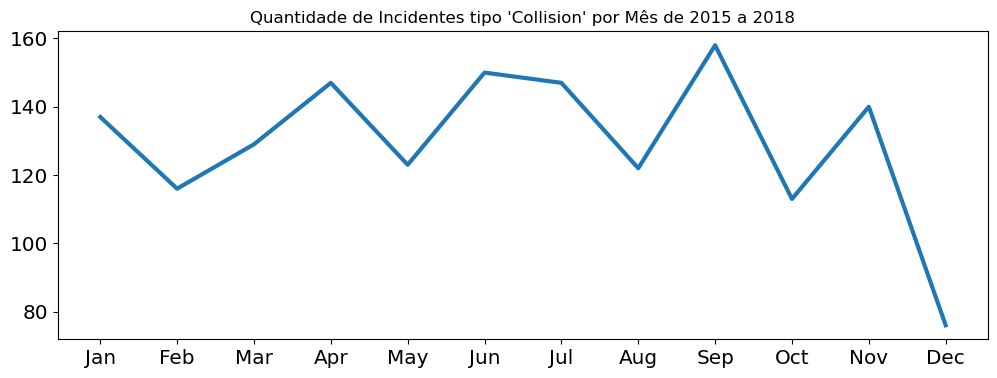

In [55]:
plt.plot(meses, valores2)
plt.title("Quantidade de Incidentes tipo 'Collision' por Mês de 2015 a 2018")
plt.show()

6- Qual foi a média de incidentes por mês envolvendo crianças (Child)?

In [56]:
#Filtrando o dataset pela faixa etária desejada
df_child = df[df['victims_age'] == 'Child']

In [57]:
#Agrupando por mês e calculando o total pela faixa etária
df_mes_child = df_child.groupby('Mes_nome')['victims_age'].value_counts()

In [58]:
#Imprimindo o resultado
print(df_mes_child)

Mes_nome  victims_age
Apr       Child          226
Aug       Child          208
Dec       Child          107
Feb       Child          146
Jan       Child          126
Jul       Child          232
Jun       Child          245
Mar       Child          190
May       Child          206
Nov       Child          120
Oct       Child          150
Sep       Child          225
Name: victims_age, dtype: int64


In [59]:
#Calculando a média de incidentes por mês envolvendo crianças
df_media_mes_child = df_mes_child.mean()
print(df_media_mes_child)

181.75


In [60]:
#Organizando os eixos para a plotagem do gráfico
meses = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
valores3 = [126,146,190,226,206,245,232,208,225,150,120,107]

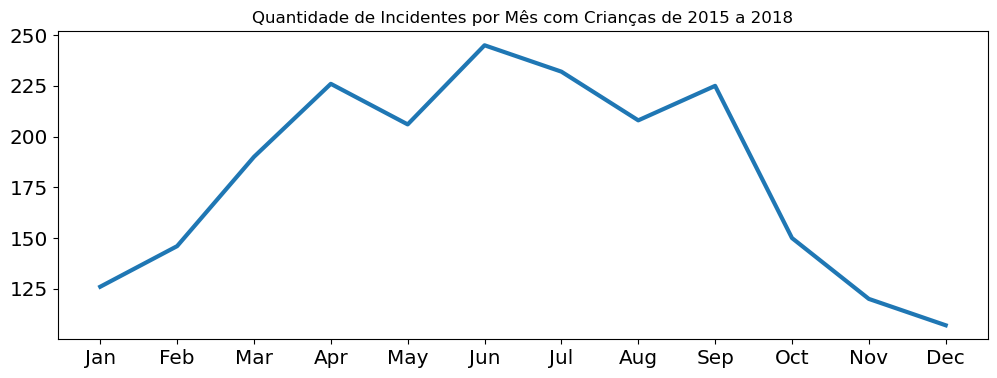

In [61]:
#Gráfico
plt.plot(meses,valores3)
plt.title('Quantidade de Incidentes por Mês com Crianças de 2015 a 2018')
plt.show()

7- Considerando a descrição de incidente como “Injuries treated on scene” 
(coluna Injury Result Description), qual o total de incidentes de pessoas 
do sexo masculino e sexo feminino?

In [62]:
#Filtrando o dataset pela descrição de incidente desejada
df7 = df[df['injury_result_description'] == 'Injuries treated on scene']

In [63]:
#Agrupando por descrição de incidente e calculando o total por cada gênero
df7 = df7.groupby('injury_result_description')['victims_sex'].value_counts()

In [64]:
#Imprimindo o resultado
print(df7)

injury_result_description  victims_sex
Injuries treated on scene  Female         8816
                           Male           5632
                           Unknown        2888
Name: victims_sex, dtype: int64


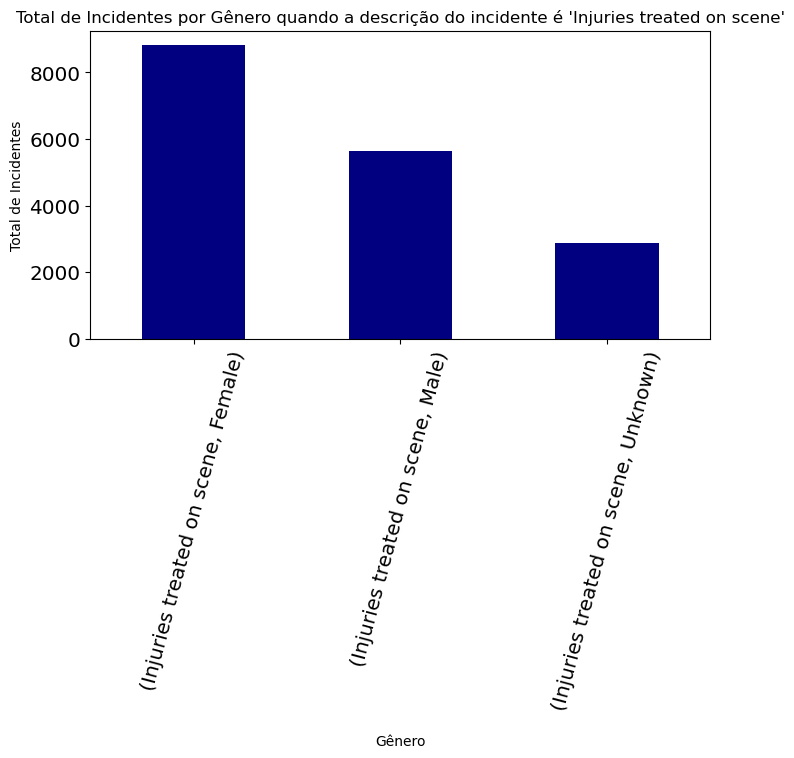

In [65]:
#Gráfico com matplotlib
df7.plot(kind = 'bar', 
                title = "Total de Incidentes por Gênero quando a descrição do incidente é 'Injuries treated on scene'",
                ylabel = 'Total de Incidentes', 
                xlabel = '\nGênero',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 75)
plt.show()

8- No ano de 2017 em qual mês houve mais incidentes com idosos 
(Elderly)?

In [66]:
#Convertendo a coluna "Mes" para object
df['Mes'] = df.Mes.astype(str)

In [67]:
#Convertendo a coluna "Ano" para object
df['Ano'] = df.Ano.astype(str)

In [68]:
#Verificando o resultado
df.dtypes

year                          int64
route                        object
operator                     object
group_name                   object
bus_garage                   object
borough                      object
injury_result_description    object
incident_event_type          object
victim_category              object
victims_sex                  object
victims_age                  object
Mes                          object
Ano                          object
Mes_nome                     object
dtype: object

In [69]:
#Filtrando o dataset pelo ano desejado
df_ano_2017 = df[df['Ano'] == '2017']

In [70]:
#Filtrando o dataset também pela faixa etária desejada
df_idosos_2017 = df_ano_2017[df_ano_2017['victims_age'] == 'Elderly']

In [71]:
#Agrupando por mês, calculando o total pela faixa etária e ordenando os valores do maior para o menor
df_idosos_mais_2017 = df_idosos_2017.groupby('Mes_nome')['victims_age'].value_counts()

In [72]:
print(df_idosos_mais_2017)

Mes_nome  victims_age
Apr       Elderly        75
Aug       Elderly        70
Dec       Elderly        67
Feb       Elderly        53
Jan       Elderly        66
Jul       Elderly        81
Jun       Elderly        65
Mar       Elderly        77
May       Elderly        69
Nov       Elderly        68
Oct       Elderly        69
Sep       Elderly        78
Name: victims_age, dtype: int64


In [73]:
#Destacando o mês em que houve mais incidentes com idosos no ano de 2017
df11 = df_idosos_mais_2017.idxmax()
print('No ano de 2017 o mês em que houve mais incidentes com idosos foi:', df11)

No ano de 2017 o mês em que houve mais incidentes com idosos foi: ('Jul', 'Elderly')


In [74]:
#Organizando os eixos para a plotagem do gráfico
meses = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
valores4 = [66,53,77,75,69,65,81,70,78,69,68,67]

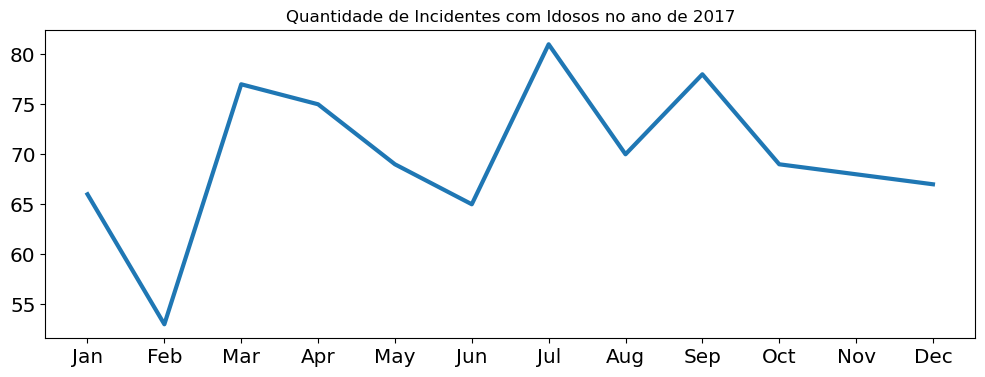

In [75]:
#Gráfico com matplotlib
plt.plot(meses,valores4)
plt.title('Quantidade de Incidentes com Idosos no ano de 2017')
plt.show()

9- Considerando o Operador qual a distribuição de incidentes ao longo do 
tempo?

In [76]:
#Filtrando o dataset por ano por Operador e calculando suas quantidades
df_ano_operador = df.groupby('Ano')['operator'].value_counts()

In [77]:
#Verificando o resultado
print(df_ano_operador)

Ano   operator            
2015  Metroline               914
      Arriva London North     789
      London United           705
      East London             681
      Arriva London South     482
                             ... 
2018  London Sovereign         32
      Docklands Buses          30
      C T Plus                 25
      Abellio West             15
      Sullivan Bus & Coach      1
Name: operator, Length: 83, dtype: int64


In [78]:
#Filtrando por ano
df_2015 = df[df['Ano']=='2015']
df_2016 = df[df['Ano']=='2016']
df_2017 = df[df['Ano']=='2017']
df_2018 = df[df['Ano']=='2018']

In [79]:
#Filtrando o dataset pelo ano de 2015 por Operador e calculando suas quantidades
df_ano_2015_operador = df_2015.groupby('Ano')['operator'].value_counts()
print(df_ano_2015_operador)

Ano   operator             
2015  Metroline                914
      Arriva London North      789
      London United            705
      East London              681
      Arriva London South      482
      London General           456
      Metroline West           306
      London Central           284
      Metrobus                 246
      Selkent                  246
      Arriva The Shires        126
      Abellio London           117
      Tower Transit            108
      Arriva Kent Thameside     73
      London Sovereign          42
      Blue Triangle Buses       35
      Docklands Buses           34
      H R Richmond              29
      Abellio West              27
      C T Plus                  15
Name: operator, dtype: int64


In [80]:
#Filtrando o dataset pelo ano de 2016 por Operador e calculando suas quantidades
df_ano_2016_operador = df_2016.groupby('Ano')['operator'].value_counts()
print(df_ano_2016_operador)

Ano   operator             
2016  Metroline                864
      East London              812
      Arriva London North      656
      London United            577
      Selkent                  513
      London General           504
      Arriva London South      429
      Metroline West           339
      London Central           327
      Metrobus                 246
      Abellio London           233
      Tower Transit            203
      Arriva The Shires        107
      London Sovereign          75
      TGM GROUP                 55
      Abellio West              34
      Arriva Kent Thameside     34
      Blue Triangle Buses       29
      Docklands Buses           19
      C T Plus                  18
      H R Richmond              17
      Sullivan Buses             2
Name: operator, dtype: int64


In [81]:
#Filtrando o dataset pelo ano de 2017 por Operador e calculando suas quantidades
df_ano_2017_operador = df_2017.groupby('Ano')['operator'].value_counts()
print(df_ano_2017_operador)

Ano   operator           
2017  Arriva London North    1026
      Metroline               940
      East London             578
      Selkent                 573
      London United           518
      Arriva London South     470
      London General          461
      London Central          438
      Metroline West          373
      Abellio London          329
      Tower Transit           303
      Metrobus                175
      Blue Triangle Buses     117
      Arriva The Shires        72
      London Sovereign         57
      Abellio West             50
      Quality Line             37
      C T Plus                 19
      Docklands Buses          17
      H R Richmond             13
      TGM GROUP                 6
      Uno Buses                 1
Name: operator, dtype: int64


In [82]:
#Filtrando o dataset pelo ano de 2018 por Operador e calculando suas quantidades
df_ano_2018_operador = df_2018.groupby('Ano')['operator'].value_counts()
print(df_ano_2018_operador)

Ano   operator            
2018  Metroline               739
      Arriva London North     737
      Selkent                 476
      London United           463
      Arriva London South     362
      East London             331
      London Central          318
      London General          302
      Abellio London          284
      Metroline West          214
      Tower Transit           124
      Metrobus                119
      Quality Line            105
      Blue Triangle Buses     100
      London Sovereign         32
      Docklands Buses          30
      C T Plus                 25
      Abellio West             15
      Sullivan Bus & Coach      1
Name: operator, dtype: int64


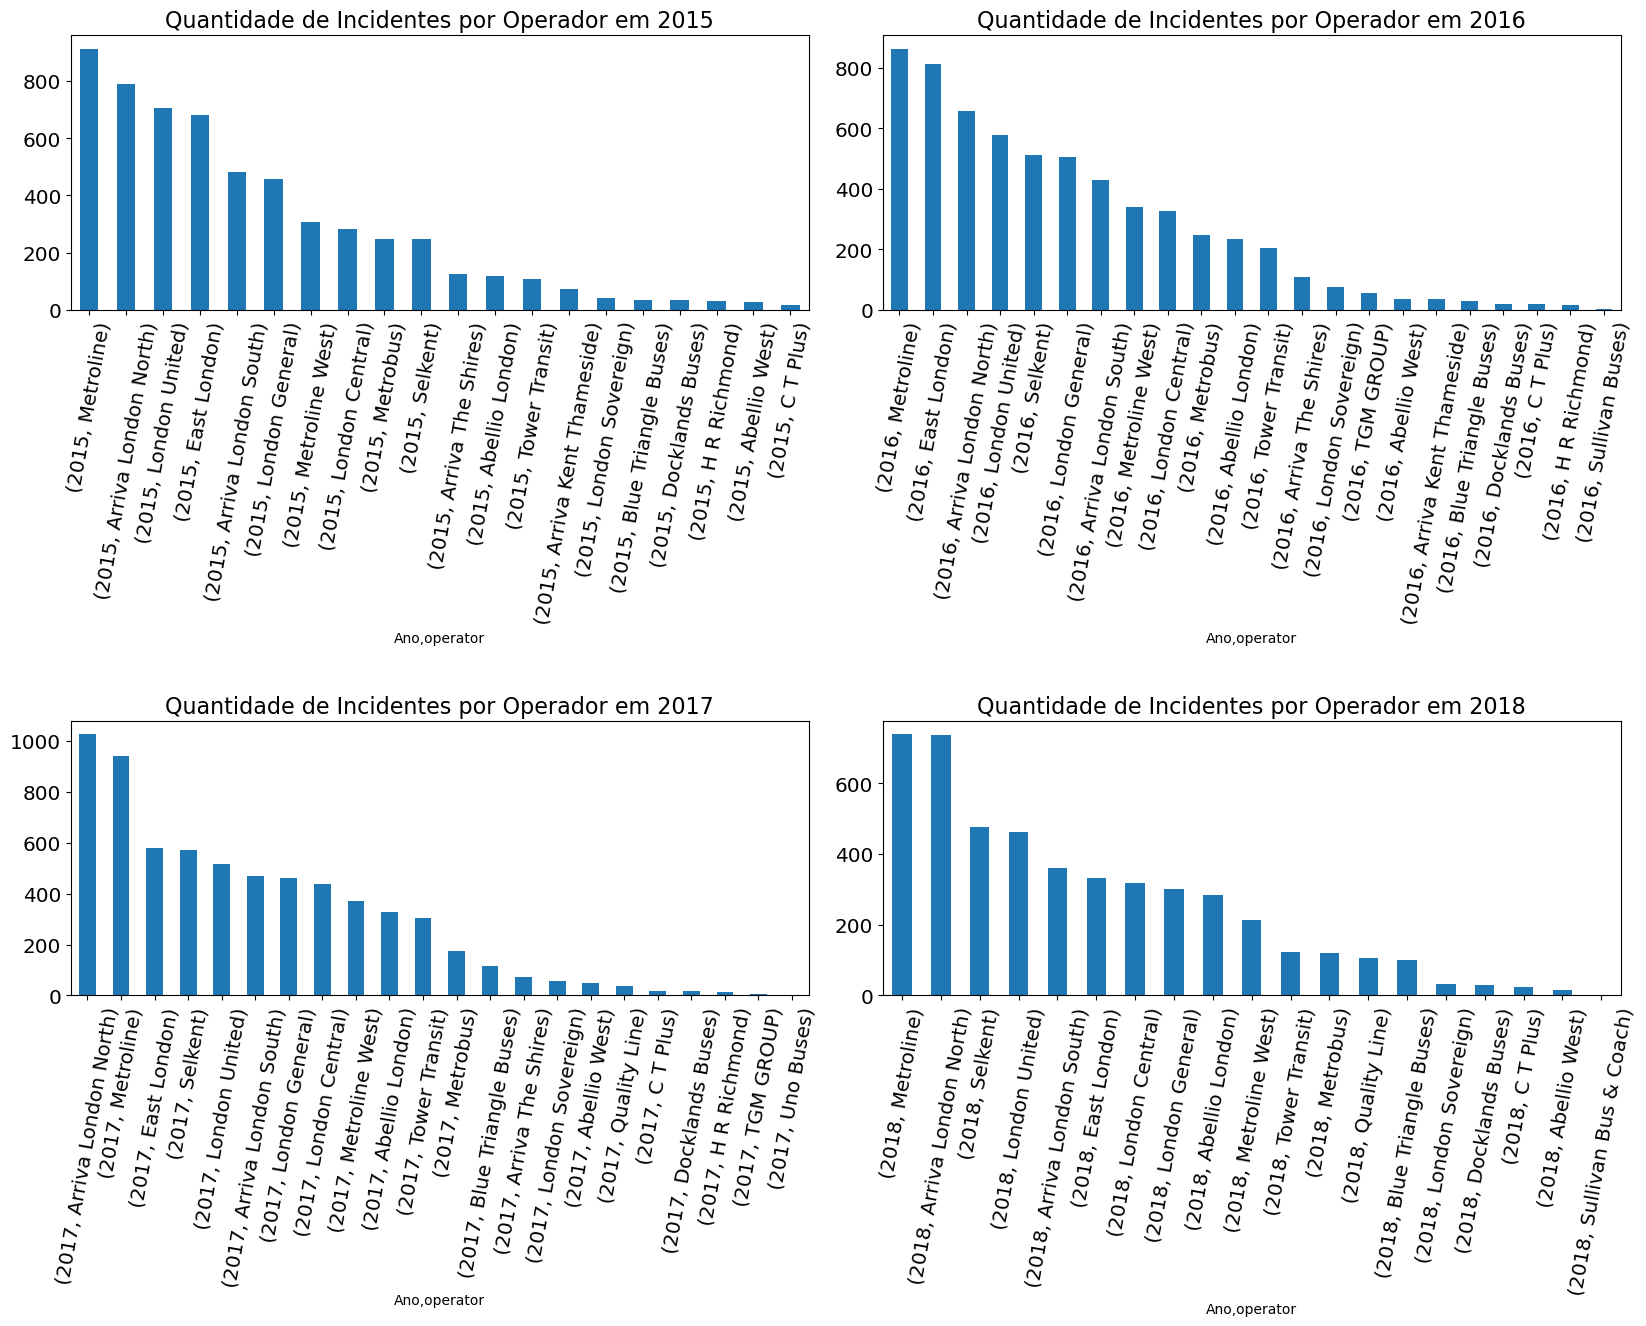

In [83]:
#Gráfico com Matplotlib
plt.figure(figsize = (20, 12))

plt.subplot(2, 2, 1)
df_ano_2015_operador.plot.bar()
plt.title("Quantidade de Incidentes por Operador em 2015", fontsize = 16)
plt.xticks(rotation = 80)

plt.subplot(2, 2, 2)
df_ano_2016_operador.plot.bar()
plt.title("Quantidade de Incidentes por Operador em 2016", fontsize = 16)
plt.xticks(rotation = 80)

plt.subplot(2, 2, 3)
df_ano_2017_operador.plot.bar()
plt.title("Quantidade de Incidentes por Operador em 2017", fontsize = 16)
plt.xticks(rotation = 80)

plt.subplot(2, 2, 4)
df_ano_2018_operador.plot.bar()
plt.title("Quantidade de Incidentes por Operador em 2018", fontsize = 16)
plt.xticks(rotation = 80)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=1.5)
plt.show()

10- Qual o tipo de incidente mais comum com ciclistas?

In [84]:
#Filtrando o dataset com o registro da categoria desejada
df_ciclistas = df[df['victim_category'] == 'Cyclist']

In [85]:
#Agrupando por tipo de incidente e calculando o total de cada tipo
df_ciclistas_tipo_incidente = df_ciclistas.groupby('Ano')['incident_event_type'].value_counts()
print (df_ciclistas_tipo_incidente)

Ano   incident_event_type
2015  Collision Incident     64
      Onboard Injuries        2
2016  Collision Incident     58
      Onboard Injuries        2
      Personal Injury         2
      Slip Trip Fall          2
2017  Collision Incident     85
      Personal Injury         2
      Slip Trip Fall          2
2018  Collision Incident     49
      Personal Injury         4
      Slip Trip Fall          3
Name: incident_event_type, dtype: int64


In [86]:
#Destacando o tipo de incidentes mais comum com ciclistas
df_maiscomum_ciclistas_tipo_incidente = df_ciclistas_tipo_incidente.idxmax()
print('O tipo de incidentes mais comum com ciclistas é:', df_maiscomum_ciclistas_tipo_incidente)

O tipo de incidentes mais comum com ciclistas é: ('2017', 'Collision Incident')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '(2015, Collision Incident)'),
  Text(1, 0, '(2015, Onboard Injuries)'),
  Text(2, 0, '(2016, Collision Incident)'),
  Text(3, 0, '(2016, Onboard Injuries)'),
  Text(4, 0, '(2016, Personal Injury)'),
  Text(5, 0, '(2016, Slip Trip Fall)'),
  Text(6, 0, '(2017, Collision Incident)'),
  Text(7, 0, '(2017, Personal Injury)'),
  Text(8, 0, '(2017, Slip Trip Fall)'),
  Text(9, 0, '(2018, Collision Incident)'),
  Text(10, 0, '(2018, Personal Injury)'),
  Text(11, 0, '(2018, Slip Trip Fall)')])

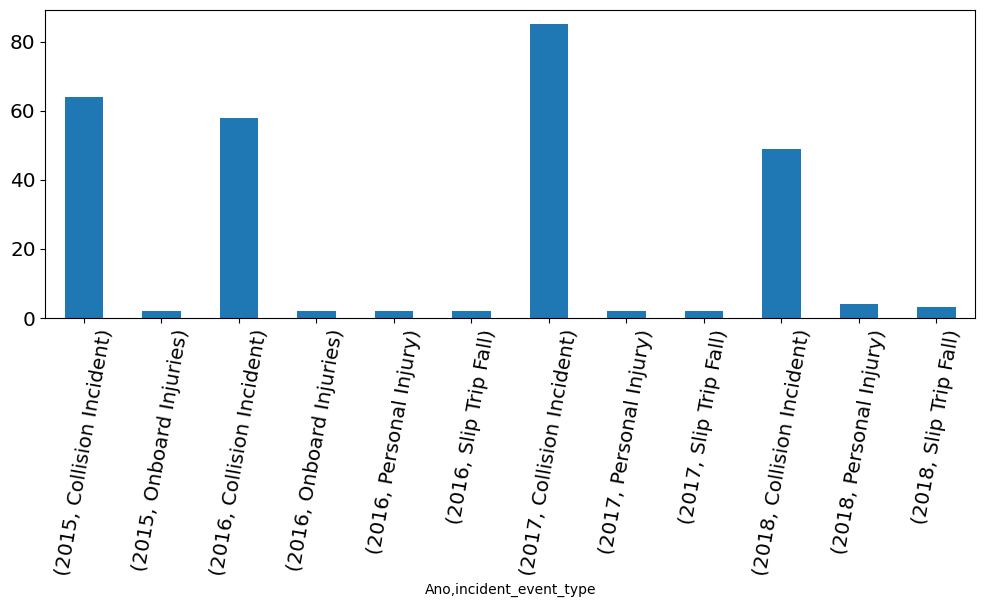

In [87]:
#Gráfico com matplotlib
df_ciclistas.groupby('Ano')['incident_event_type'].value_counts().plot.bar()
plt.xticks(rotation = 80)